# Jupyter - SQLite

Example Jupyter Notebook for SQLite.

```mermaid
flowchart LR
	Jupyter --> SQLite (in-memory)
```

## Kernel Setup

Configure the Jupyter Kernel.

In [79]:
# ipython-sql enables the %sql and %%sql magic statements
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


## Connections

Manage DBMS connections.

### List Connections

Open database connections.

In [80]:
%sql --connections

{'sqlite:///': <sql.connection.Connection at 0x234c0edae50>}

### Open a Connection

In [81]:
# connection string to an in-memory sqlite instance
%sql sqlite:///:memory:

### Close a Connection

In [82]:
# Close a connection by name
%sql --close sqlite:///:memory:

# open a default connection (in-memory)
%sql sqlite:///

## Magic Queries

Invoke queries with the `%sql` and `%%sql` magics for single and multi-line queries.

### Setup Example Schema

Setup an example database schema.

```mermaid
erDiagram
    WRITER {
        string first_name
        string last_name
        int year_of_death
    }
```

In [83]:
%%sql
CREATE TABLE writer (first_name, last_name, title, start_year);
INSERT INTO writer VALUES ('Peter', 'Gibbons', 'Manager', 1998);
INSERT INTO writer VALUES ('Milton', 'Waddams', 'Fixed', 1991);
INSERT INTO writer VALUES ('Bill', 'Lumbergh', 'Manager', 1992);
INSERT INTO writer VALUES ('Bob', 'Slydell', 'Consultant', 1999);
INSERT INTO writer VALUES ('Michael', 'Bolton', 'Programmer', 1996);
INSERT INTO writer VALUES ('Samir', 'Nagheenanajar', 'Programmer', 1993);

 * sqlite:///
(sqlite3.OperationalError) table writer already exists
[SQL: CREATE TABLE writer (first_name, last_name, title, start_year);]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


### Single-Line Query

Execute a single-line SQL query with the `%sql` magic statement.

In [84]:
%sql SELECT * FROM writer

 * sqlite:///
Done.


first_name,last_name,title,start_year
Peter,Gibbons,Manager,1998
Milton,Waddams,Severed,1991
Bill,Lumbergh,Manager,1992
Bob,Slydell,Consultant,1999
Michael,Bolton,Programmer,1996
Samir,Nagheenanajar,Programmer,1993


### Multi-Line Query

Execute multi-line SQL queries with the `%%sql`` magic statement.

In [85]:
%%sql
SELECT
	*
FROM
	writer
LIMIT 10;

 * sqlite:///
Done.


first_name,last_name,title,start_year
Peter,Gibbons,Manager,1998
Milton,Waddams,Severed,1991
Bill,Lumbergh,Manager,1992
Bob,Slydell,Consultant,1999
Michael,Bolton,Programmer,1996
Samir,Nagheenanajar,Programmer,1993


### Parameterized SQL Queries

Safely use variables in a SQL query by binding values to a parameterized SQL query. Jupyter Notebooks makes it easy, so there's still no excuse for SQL injection attacks in 2022.

- Define variables in Python: `varname = 'Value'`
- Reference variables in queries: `:varname`

In [86]:
t = 'Manager'
%sql SELECT * FROM writer WHERE title = :t;

 * sqlite:///
Done.


first_name,last_name,title,start_year
Peter,Gibbons,Manager,1998
Bill,Lumbergh,Manager,1992


### Bind Query Results to a Variable

Bind query results to a Python variable.

- Single-line assignment syntax: `varname = %sql ...`
- Multi-line assignment syntax: `%%sql varname = << ...`

In [87]:
#-- single-line assignment
result = %sql SELECT * FROM writer WHERE title = 'Programmer';

 * sqlite:///
Done.


In [88]:
%%sql result2 <<
-- multi-line assignment
SELECT *
FROM writer
WHERE title NOT IN ('Consultant', 'Programmer', 'Manager');

 * sqlite:///
Done.
Returning data to local variable result2


### Pass Results in a Variable

Output query data passed between cells. Output from the last cell executed is stored in an automatic variable named `_`.

In [89]:
#-- First cell
#----------------
#-- Save results to a variable.
result = %sql SELECT * FROM writer WHERE title ='Programmer';

#-- No cell output

 * sqlite:///
Done.


In [90]:
#-- SECOND CELL
#----------------
#-- Output results saved from the first cell.
result

first_name,last_name,title,start_year
Michael,Bolton,Programmer,1996
Samir,Nagheenanajar,Programmer,1993


### Pass Results in the Automatic Variable: `_`

`_` is an variable containing output from a previously executed cell.

In [91]:
#-- First cell
#----------------
#-- Save results to a variable.
%sql SELECT * FROM writer WHERE TABLE_TYPE='Manager';

 * sqlite:///
(sqlite3.OperationalError) no such column: TABLE_TYPE
[SQL: SELECT * FROM writer WHERE TABLE_TYPE='Manager';]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [92]:
#-- Second cell
#----------------
#-- Obtain results from a variable.
result = _

print('result in tabular format:')
print(result)

result in tabular format:
+------------+---------------+------------+------------+
| first_name |   last_name   |   title    | start_year |
+------------+---------------+------------+------------+
|  Michael   |     Bolton    | Programmer |    1996    |
|   Samir    | Nagheenanajar | Programmer |    1993    |
+------------+---------------+------------+------------+


### Access Result Values

Various ways to access data from query execution results.

In [93]:
print('table columns:')
print(result.keys)
print('first row value: ')
print(result[0])

print('first row, first column: ' + result[0][0])
print('first row and a named column: ' + result[0]["first_name"])
print('first row and an object property column: ' + result[0].last_name)

table columns:
RMKeyView(['first_name', 'last_name', 'title', 'start_year'])
first row value: 
('Michael', 'Bolton', 'Programmer', 1996)
first row, first column: Michael
first row and a named column: Michael
first row and an object property column: Bolton


## Pandas

Process data directly in Python with Pandas DataFrames and the SQLAlchemy ORM.

### Convert Results to a DataFrame

Execute a SQL query and convert the results into a Pandas DataFrame.

In [94]:
#-- Execute a query and save the result as a Pandas DataFrame.
result = %sql SELECT * FROM writer;
dataframe = result.DataFrame()

 * sqlite:///
Done.


### Persist a DataFrame to a New Database Table

Save a DataFrame to a new table with the `--persist <variable>` command. The table is named after the DataFrame variable.

In [95]:
%sql --persist dataframe

 * sqlite:///


'Persisted dataframe'

In [96]:
%%sql
-- access the perisisted data
SELECT TOP 10 *
FROM dataframe;

 * sqlite:///
(sqlite3.OperationalError) near "10": syntax error
[SQL: -- access the perisisted data
SELECT TOP 10 *
FROM dataframe;]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


### Append a DataFrame to an existing Database Table

In [97]:
#-- Append data to an existing table.
#-- Run this cell multiple times to see the data duplicated after each run.
%sql --append dataframe

#-- Select the perisisted data.
%sql SELECT COUNT(1) as APPENDED_RECORD_CNT FROM dataframe;

 * sqlite:///
 * sqlite:///
Done.


APPENDED_RECORD_CNT
12


### Drop the Persisted Database Table

In [98]:
#-- cleanup data from example
%sql DROP TABLE dataframe

 * sqlite:///
Done.


[]

## Matplotlib

[matplotlib](https://matplotlib.org/) is used to plot graphs.

### Configure

Configure matplotlib.

In [99]:
# Produce an inline PNG image instead of opening a GUI application.
%matplotlib inline

### Pie Chart

 * sqlite:///
Done.


([<matplotlib.patches.Wedge at 0x234d6aa5610>,
 [Text(0.9526279355804298, 0.5500000148652441, 'Consultant'),
  Text(-0.5500000594609755, 0.9526279098330699, 'Manager'),
  Text(-0.5499998810780428, -0.9526280128224968, 'Programmer'),
  Text(0.9526280385698485, -0.5499998364823061, 'Severed')])

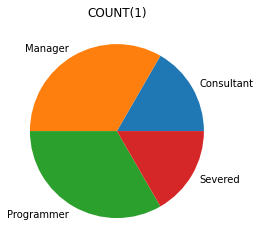

In [104]:
result = %sql SELECT title, COUNT(1) FROM writer GROUP BY title;
result.pie()


### Bar Chart

<BarContainer object of 4 artists>

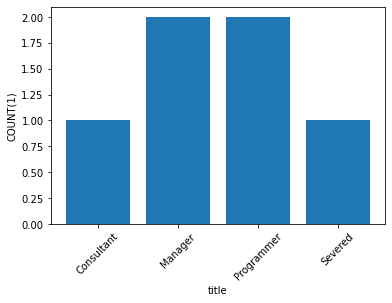

In [105]:
result.bar()